# Dataset Link: https://www.kaggle.com/datasets/falgunipatel19/biomedical-text-publication-classification
For Biomedical text document classification, abstract and full papers(whose length less than or equal to 6 pages) available and used. This dataset focused on long research paper whose page size more than 6 pages. Dataset includes cancer documents to be classified into 3 categories like 'ThyroidCancer','ColonCancer','Lung_Cancer'.
Total publications=7569. it has 3 class labels in dataset.
number of samples in each categories:
colon cancer=2579, lung cancer=2180, thyroid cancer=2810

In [1]:
#Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud
from textblob import TextBlob
from nltk import word_tokenize,sent_tokenize
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner'])
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

2022-09-10 21:09:14.510426: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-10 21:09:14.550292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-10 21:09:14.550324: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-10 21:09:16.405241: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-10 21:09:16.405292: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to c

In [2]:
#Read the data using the pandas 
data=pd.read_csv('/home/vinod/Downloads/alldata_1_for_kaggle.csv',encoding='latin1')
data.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [3]:
#data information in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.5+ KB


In [4]:
#Check the data shape of the dataset
data.shape

(7570, 3)

In [5]:
#Check the null values in the dataset
data.isna().sum()

Unnamed: 0    0
0             0
a             0
dtype: int64

# Data Preprocessing

In [6]:
#Let's remove the unnecassary columns in the dataset
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head().style.background_gradient(cmap='winter')

In [7]:
#Rename the column names
data.rename({'0':'Label','a':'Text'},axis=1,inplace=True)

# EDA Process

In [8]:
#Check the data columns
data.columns

Index(['Label', 'Text'], dtype='object')

In [9]:
data[data.Label=='Lung_Cancer'].Text[539]

'"We lack biomarkers for identifying aggressive primary tumor subsets that give rise to metastases and impact early cancer detection and treatment. Many solid tumors are known to accumulate hyaluronan (HA) a glycosaminoglycan which is also produced by the tumor cells themselves. We report a quantitative approach for uncovering breast cancer heterogeneity using fluorescent HA to detect differential binding patterns to CD44 and RHAMM/HMMR receptors. This approach permits identification of tumor-cell subsets that bind high levels of HA and may be applicable to other ligands/receptors and disease models. Despite representing the invasive/metastatic subset of parental tumors unexpectedly the high HA-binding subset was slow-growing and is thus likely to be a source of dormancy and relapse. Tumor heterogeneity confounds cancer diagnosis and the outcome of therapy necessitating analysis of tumor cell subsets within the tumor mass. Elevated expression of hyaluronan (HA) and HA receptors recepto

In [10]:
#Let's count the label values in the dataset
label=data['Label'].value_counts()
label

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: Label, dtype: int64

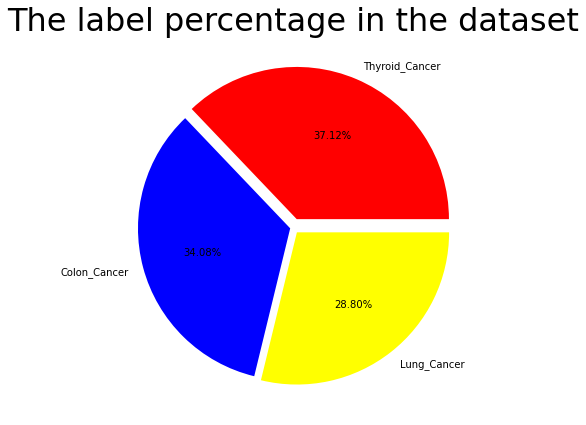

In [11]:
#Let's visualize the above information on the dataset
plt.figure(figsize=(19,7))
plt.pie(label,
    labels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],
    colors=['Red','blue','yellow'],
    autopct='%1.2f%%',explode=[0.06,0.02,0.04])
plt.title("The label percentage in the dataset",fontsize=32)
plt.show()

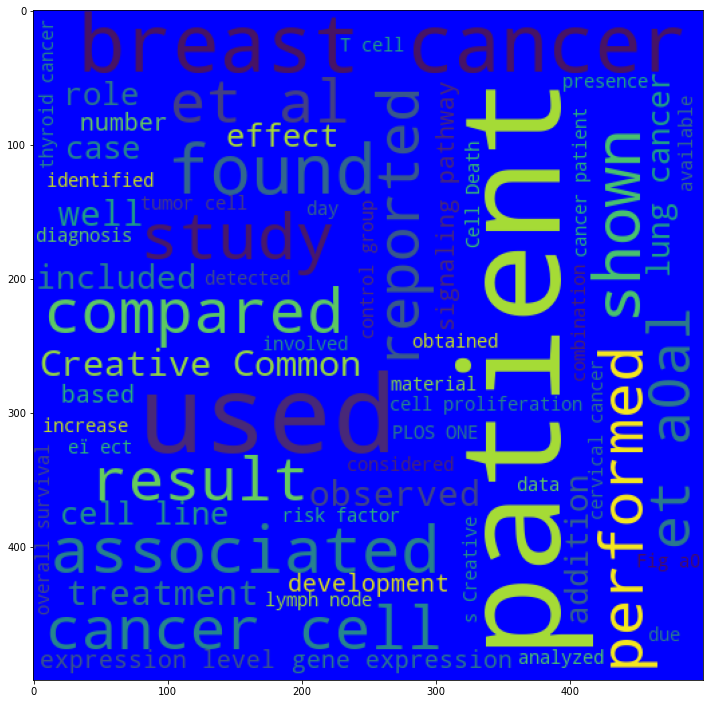

In [12]:
#Visualize the WordCloud in the Thyroid_Cancer from the dataset
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='blue')
w_c=wc.generate(data[data['Label']=='Thyroid_Cancer']['Text'].str.cat(sep=" "))
plt.imshow(w_c)

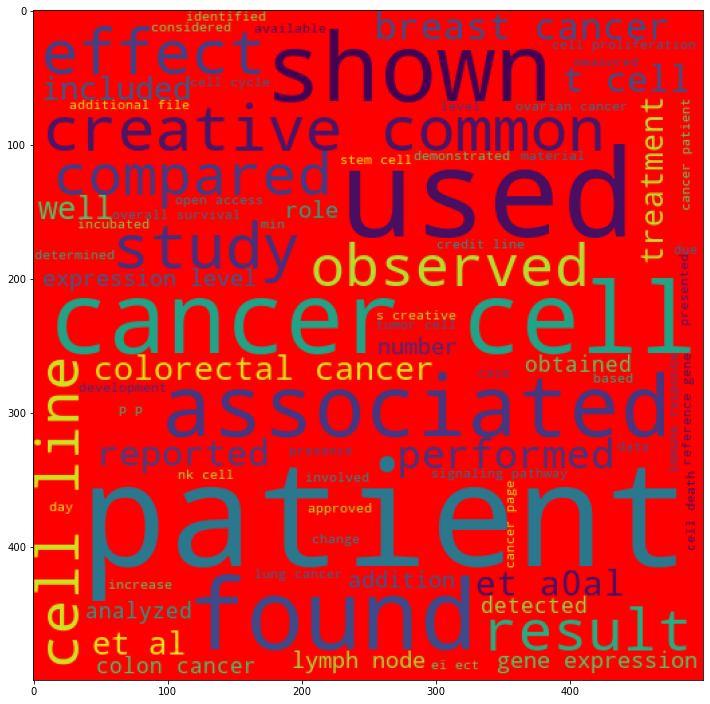

In [13]:
#Visualize the WordCloud in the Colon_Cancer from the dataset
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='red')
wc_1=wc.generate(data[data['Label']=='Colon_Cancer']['Text'].str.cat(sep=" "))
plt.imshow(wc_1)

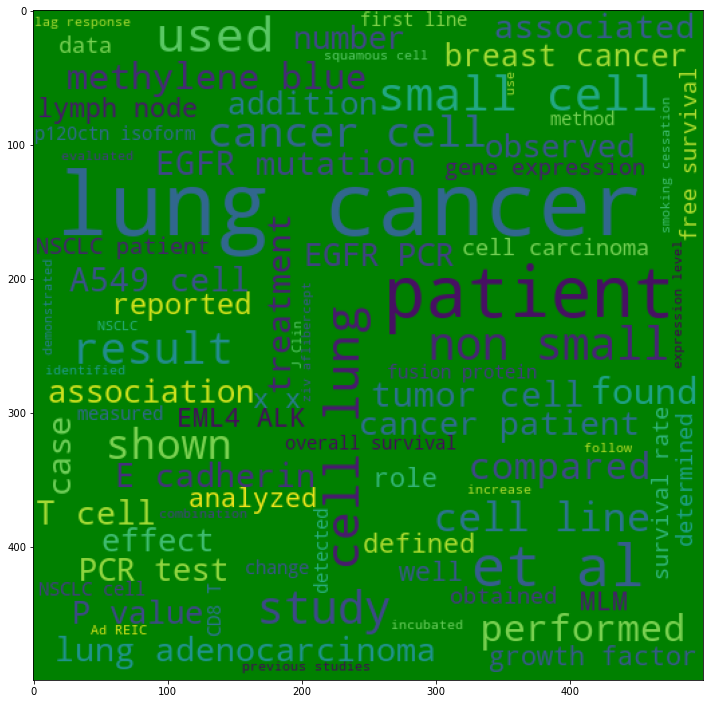

In [14]:
#Visualize the WordCloud in the Colon_Cancer from the dataset
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='green')
wc_2=wc.generate(data[data['Label']=='Lung_Cancer']['Text'].str.cat(sep=" "))
plt.imshow(wc_2)

# DATA PREPROCESSING

# Remove the numbers in the dataset

In [15]:
#Define the function for remove the numbers in the dataset
def remove_number(text):
    #Create loop for remove the digits in the dataset
    text="".join([i for i in text if not i.isdigit()])
    #Return to the dataset
    return text
#Apply the above function to the dataset
data['Text']=data['Text'].apply(remove_number)

# Clean the text

In [16]:
#Define the function to clean the text
def clean_text(text):
    pattern = r'[^a-zA-Z\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply to the function to the dataset
data['Text']=data['Text'].apply(clean_text)

# Remove the stopwords

In [17]:
#Create function to the remove the stopwods
names = ['Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer']
def clean_stop(text):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in text.split() if w.lower() not in stop_words and len(w) > 1])
#And finally apply the above function to the dataset
data['Text']=data['Text'].apply(clean_stop)

# Tokenizeation

In [18]:
#Define the tokenize function 
def tokenize(d):
    return word_tokenize(d)
data['Text']=data['Text'].apply(tokenize)

In [19]:
data.head()

,Label,Text
0,Thyroid_Cancer,"[thyroid, surgery, children, single, instituti..."
1,Thyroid_Cancer,"[adopted, strategy, used, prior, years, based,..."
2,Thyroid_Cancer,"[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,"[solitary, plasmacytoma, sp, skull, uncommon, ..."
4,Thyroid_Cancer,"[study, aimed, investigate, serum, matrix, met..."


# Remove the special characters

In [20]:
#removing special character
def remove_special_char(list):
    y=[]
    for string in list:
        if string.isalnum():
            y.append(string)
    return y
data['Text']=data['Text'].apply(lambda x:remove_special_char(x))

In [21]:
data.head()

,Label,Text
0,Thyroid_Cancer,"[thyroid, surgery, children, single, instituti..."
1,Thyroid_Cancer,"[adopted, strategy, used, prior, years, based,..."
2,Thyroid_Cancer,"[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,"[solitary, plasmacytoma, sp, skull, uncommon, ..."
4,Thyroid_Cancer,"[study, aimed, investigate, serum, matrix, met..."


# Stemming process

In [22]:
#Create a function to the stemming processs
ps=PorterStemmer()
def stemming(list):
    #Create a empty list 
    y=[]
    #Create a for loop for text in list
    for text in list:
        #Then i finallay append to the empty list
        y.append(ps.stem(text))
    #then return to the empty list
    return y
data['Text']=data['Text'].apply(lambda x:stemming(x))
#join the words 
data['Text']=data['Text'].apply(lambda x:" ".join(x))

In [23]:
data.head()

,Label,Text
0,Thyroid_Cancer,thyroid surgeri children singl institut osama ...
1,Thyroid_Cancer,adopt strategi use prior year base four exclus...
2,Thyroid_Cancer,coronari arterybypass graft thrombosi brin bri...
3,Thyroid_Cancer,solitari plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,studi aim investig serum matrix metalloprotein...


# Modeling 

In [24]:
#Divided the data into two variables
X=data['Text']
y=data['Label']

In [25]:
#install the TfidfVectorizer
vector=TfidfVectorizer()
#Fit the X data to the TfidfVectorizer
vector.fit(X)
#And transform the 
X=vector.transform(X)

In [26]:
#And Divided the data into traing and testing and finally split the data and
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# LogisticRegression

In [27]:
#Install the logisticregression model 
logistic=LogisticRegression()
#And fit the model to the train data
logistic.fit(X_train,y_train)

LogisticRegression()

In [28]:
#Prediction of the logisticregression algorithm
logistic_pred=logistic.predict(X_test)
logistic_pred

array(['Colon_Cancer', 'Colon_Cancer', 'Colon_Cancer', ..., 'Lung_Cancer',
       'Thyroid_Cancer', 'Colon_Cancer'], dtype=object)

In [29]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [30]:
#Check the test score and train score to the logisticregression algorithm
print(f'The Test_accuracy: {logistic.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {logistic.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,logistic_pred)*100:.2f}')

The Test_accuracy: 93.29
The Train_accuracy: 95.90
The Accuracy_score: 93.29


# Classification_report and Confusion_matrix

                precision    recall  f1-score   support

  Colon_Cancer       0.91      0.90      0.90       664
   Lung_Cancer       1.00      1.00      1.00       515
Thyroid_Cancer       0.91      0.91      0.91       714

      accuracy                           0.93      1893
     macro avg       0.94      0.94      0.94      1893
  weighted avg       0.93      0.93      0.93      1893



<AxesSubplot:>

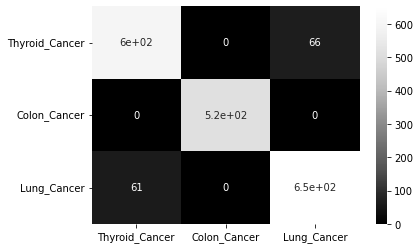

In [31]:
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='Greys_r',xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])

# DecisionTreeClassifier

In [32]:
#Import the DecisionTreeClassifier algortihm
from sklearn.tree import DecisionTreeClassifier
#install the DecisionTreeClassifier model
tree=DecisionTreeClassifier()
#Fit the train data to the model
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
#Prediction of the DecisionTreeClassifier algorithm
tree_pred=tree.predict(X_test)
tree_pred

array(['Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', ...,
       'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer'], dtype=object)

In [34]:
#Check the test score and train score to the DecisionTreeClassifier algorithm
print(f'The Test_accuracy: {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,tree_pred)*100:.2f}')

The Test_accuracy: 100.00
The Train_accuracy: 100.00
The Accuracy_score: 100.00


# Classification_report and Confusion_matrix

                precision    recall  f1-score   support

  Colon_Cancer       1.00      1.00      1.00       664
   Lung_Cancer       1.00      1.00      1.00       515
Thyroid_Cancer       1.00      1.00      1.00       714

      accuracy                           1.00      1893
     macro avg       1.00      1.00      1.00      1893
  weighted avg       1.00      1.00      1.00      1893



<AxesSubplot:>

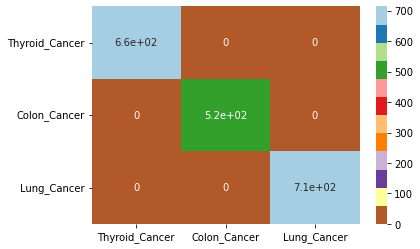

In [35]:
#Classification report
print(classification_report(y_test,tree_pred))
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='Paired_r',xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])

# RandomForestClassifier

In [36]:
#Import the RandomForestClassifier algortihm
from sklearn.ensemble import RandomForestClassifier
#install the DecisionTreeClassifier model
random=RandomForestClassifier()
#Fit the train data to the model
random.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
#Prediction of the RandomForestClassifier algorithm
random_pred=random.predict(X_test)
random_pred

array(['Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', ...,
       'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer'], dtype=object)

In [38]:
#Check the test score and train score to the RandomForestClassifier algorithm
print(f'The Test_accuracy: {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,random_pred)*100:.2f}')

The Test_accuracy: 100.00
The Train_accuracy: 100.00
The Accuracy_score: 100.00


# Classification_report and Confusion_matrix

                precision    recall  f1-score   support

  Colon_Cancer       1.00      1.00      1.00       664
   Lung_Cancer       1.00      1.00      1.00       515
Thyroid_Cancer       1.00      1.00      1.00       714

      accuracy                           1.00      1893
     macro avg       1.00      1.00      1.00      1893
  weighted avg       1.00      1.00      1.00      1893



<AxesSubplot:>

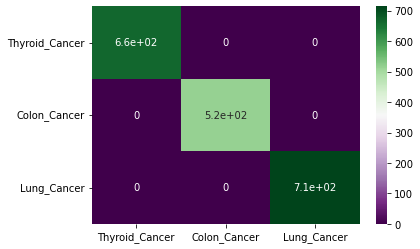

In [39]:
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='PRGn',xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])

# MultinomialNB

In [40]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
multinomial=MultinomialNB()
#fit the train data to our model
multinomial.fit(X_train,y_train)

MultinomialNB()

In [41]:
#Prediction to the test data MultinomialNB
multinomial_pred=multinomial.predict(X_test)
multinomial_pred

array(['Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', ...,
       'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer'], dtype='<U14')

In [42]:
#Check the test score and train score to the MultinomialNB algorithm
print(f'The Test_accuracy: {multinomial.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {multinomial.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,multinomial_pred)*100:.2f}')

The Test_accuracy: 90.86
The Train_accuracy: 93.62
The Accuracy_score: 90.86


# Classification_report and Confusion_matix

                precision    recall  f1-score   support

  Colon_Cancer       0.91      0.83      0.87       664
   Lung_Cancer       0.99      0.99      0.99       515
Thyroid_Cancer       0.85      0.93      0.89       714

      accuracy                           0.91      1893
     macro avg       0.92      0.91      0.92      1893
  weighted avg       0.91      0.91      0.91      1893



<AxesSubplot:>

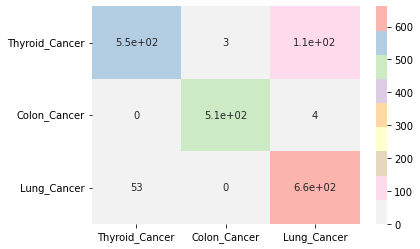

In [43]:
#Classification report
print(classification_report(y_test,multinomial_pred))
#confusion_matrix
cn=confusion_matrix(y_test,multinomial_pred)
sns.heatmap(cn,annot=True,cmap='Pastel1_r',xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])

# XGBClassifier

In [44]:
#Import the XGBClassifier model and install the model
from xgboost import XGBClassifier
#install the XGBClassifier
xgb=XGBClassifier()
#And finally fit the data to train data
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [45]:
#Prediction to the test data XGBClassifier
xgb_pred=xgb.predict(X_test)
xgb_pred

array(['Colon_Cancer', 'Colon_Cancer', 'Thyroid_Cancer', ...,
       'Lung_Cancer', 'Thyroid_Cancer', 'Colon_Cancer'], dtype=object)

In [46]:
#Check the test score and train score to the XGBClassifier algorithm
print(f'The Test_accuracy: {xgb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {xgb.score(X_train,y_train)*100:.2f}')
#Check the accuracy_score to the model
print(f'The Accuracy_score: {accuracy_score(y_test,xgb_pred)*100:.2f}')

The Test_accuracy: 100.00
The Train_accuracy: 100.00
The Accuracy_score: 100.00


# Classification_report and Confusion_matrix

                precision    recall  f1-score   support

  Colon_Cancer       1.00      1.00      1.00       664
   Lung_Cancer       1.00      1.00      1.00       515
Thyroid_Cancer       1.00      1.00      1.00       714

      accuracy                           1.00      1893
     macro avg       1.00      1.00      1.00      1893
  weighted avg       1.00      1.00      1.00      1893



<AxesSubplot:>

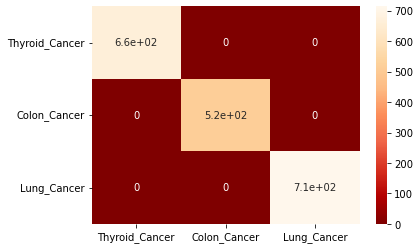

In [47]:
#Classification report
print(classification_report(y_test,xgb_pred))
#confusion_matrix
cn=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cn,annot=True,cmap='OrRd_r',xticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'],yticklabels=['Thyroid_Cancer','Colon_Cancer','Lung_Cancer'])

# Deep Learning models

In [48]:
#Import the necessary librairys
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import time
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential, load_model
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.utils import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer

In [61]:
#Create the dummies values to the dataset and divided the data train test split
y = pd.get_dummies(data.Label)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

In [50]:
#Creat the maX_word and max_len variables
max_words = 5000
max_len = 300
#Then create a function for the panding the text data 
def tokenize_pad_sequences(text):
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', data['Text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(data['Text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 thyroid surgeri children singl institut osama ibrahim almosallama ali aseerib ahm alhumaida ali alzahran saif alsobhib saud alshanafeybfrom adepart surgeri colleg medicin qassim univers buraidah al qassim saudi arabia bdepart surgeri king faisal specialist hospit research center riyadh saudi arabia cdepart medicin king faisal specialist hospit research center riyadh saudi arabia correspond dr osama ibrahim almosallam depart surgeri colleg medicin qassim univers po box buraidah al qassim saudi arabia osamaiaahotmailcom orcid orcid citat almosallam oi aseeri alhumaid alzahrani alsobhi alshanafey thyroid surgeri children singl institut ann saudi med receiv januari accept may publish august copyright copyright annal saudi medicin saudi arabia access creativ common attributionnoncommercialnoderiv intern licens cc byncnd detail access httpcreativecommon licensesbyncndfund nonebackground data thyroid surgeri children scarceobject analyz outcom data thyroid surg

In [51]:
#Vocab_size
vocab_size = 5000
#Embeddig_size
embedding_size = 32
epochs=50
#Let's install the Sequential model
model= Sequential()
#then add the Embedding to the model with the vocab_size and input_length
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
#Add the convlution 1d to the model with filters 32 and padding, relu activation function
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#Add another macpooling layer to the model
model.add(MaxPooling1D(pool_size=2))
#Add the LSTM to the model
model.add(Bidirectional(LSTM(32)))
#Add the dropout function to the model
model.add(Dropout(0.4))
#And finally add to the dense layer to the model
model.add(Dense(3, activation='sigmoid'))

plot_model(model, show_shapes = True)

2022-09-10 21:17:07.968023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [52]:
#Let's compile the model the categorical_crossentropy loss function and adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 300, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 150, 32)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [62]:
#Create a earlystopping function
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64
#And fit the model to thre train and validation data
history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
67/67 [==============================] - 8s 74ms/step - loss: 0.9791 - accuracy: 0.4713 - val_loss: 0.6943 - val_accuracy: 0.6247
Epoch 2/50
67/67 [==============================] - 4s 67ms/step - loss: 0.4512 - accuracy: 0.8351 - val_loss: 0.2462 - val_accuracy: 0.9290
Epoch 3/50
67/67 [==============================] - 4s 65ms/step - loss: 0.1701 - accuracy: 0.9566 - val_loss: 0.1000 - val_accuracy: 0.9719
Epoch 4/50
67/67 [==============================] - 4s 65ms/step - loss: 0.1443 - accuracy: 0.9533 - val_loss: 0.1154 - val_accuracy: 0.9565
Epoch 5/50
67/67 [==============================] - 4s 65ms/step - loss: 0.0598 - accuracy: 0.9866 - val_loss: 0.0546 - val_accuracy: 0.9868
Epoch 6/50
67/67 [==============================] - 4s 67ms/step - loss: 0.0452 - accuracy: 0.9882 - val_loss: 0.0473 - val_accuracy: 0.9840
Epoch 7/50
67/67 [==============================] - 4s 65ms/step - loss: 0.0316 - accuracy: 0.9925 - val_loss: 0.0397 - val_accuracy: 0.9884
Epoch 8/50
67

In [63]:
loss, accuracy = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))

Accuracy  : 0.9941


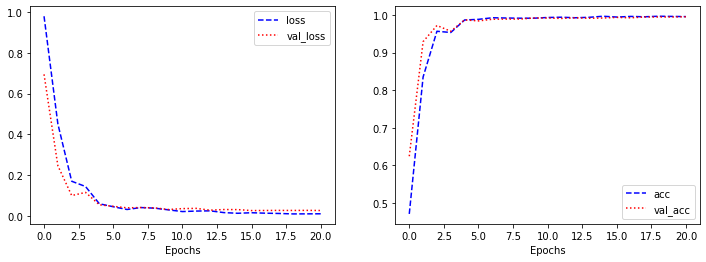

In [64]:
#To visualize the the accuracy score to the model using the matplotlib
plt.figure(figsize=(12, 4))
#Create a subplots to the model
plt.subplot(1, 2, 1)
#plot the loss of the mode history
plt.plot(history.history['loss'], 'b--', label = 'loss')
#plot the val_loss of the history
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
#On x-axis Epochs
plt.xlabel('Epochs')
plt.legend()
#Create a subplots to the model
plt.subplot(1, 2, 2)
#plot the accuracy of the mode history
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
#plot the val_accuracy of the mode history
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
#On x-axis Epochs
plt.xlabel('Epochs')
plt.legend()

plt.show()


# Test The model predict the good result

In [65]:
text='the endothelium is crucial for vein integrity andprevention of thrombosis9 and its focal disruption maypredispose to vessel thrombosis2 SV manipulation andimplantation leads to loss of endothelial integrity and elicitsan inï¬ammatory response with platelet adhesion and leukocyte recruitment Notwithstanding an overt thrombosis isextremely rare in the operating room SV dissection results inblood ï¬ow disruption in vasa vasorum and causes adventitial damage hypoxia and vessel wall hyponutrition10 Acuteperioperative saphenous vein graft failure is almost always aresult of graft thrombosis but this very uncommonly occursprior to graft placement Surgical factorslike technicalanastomotic failure or severe disproportion between thetarget vessel and the graft may lead to thrombosis butvessel injury and hypercoagulability are among potentialcauses as well11There was no evident inï¬ammatory process in microscopy inour patient but even if an inï¬ammatory process was presentTH Vol No 0cBilateral Saphenous Vein Thrombosis during CABG Mazur et ale201preoperatively in our patients SVs the inï¬ammatory background alone could not explain the dramatic intraoperativethrombosis We hypothesized that increased thrombin generation and prothrombotic ï¬brin clot phenotype were responsiblefor the clinical presentation Conversion of ï¬brinogen to ï¬brinfacilitated by thrombin is a concluding step of coagulation Ithas been shown that ï¬brin clots with small pores betweentightly packed thin ï¬brin ï¬bers are relatively lysis resistant12Such clot phenotype has been evidenced in multiple thromboticpathologies such as myocardial infarction6 ischemic stroke13and venous thromboembolism4 The prothrombotic clotphenotype reï¬ected by a tendency to form dense ï¬brin clotsresistant to lysis has been previously reported in patients withinstent thrombosis14 While routine thrombophilia screeningresults in a high almost detection rate of commonhypercoagulable states15 there are prothrombotic conditionsthat escape routine diagnostic approach The overall microscopic clot appearance and prothrombotic ï¬brin properties lead tothe discovery of two mutations in our patient that are notroutinely tested during thrombophilia screening namely ï¬brinogen 455G A and FXIII100G TElevated ï¬brinogen was postulated as one of the riskfactors for early graft failure after CABG1116 Epidemiologicalstudies have established that elevated ï¬brinogen is stronglyassociated with cardiovascular diseases17 A metaanalysis of individual records of participants from prospective studies revealed that age and sexadjustedhazard ratio per gL increase in usual ï¬brinogen level forcoronary heart disease was conï¬dence interval [CI] while for stroke the hazard ratio was as high as 95CI  Risk of coronary disease progression wasalso linked to genetic polymorphisms of the ï¬brinogen geneDe Maat et al found that A allele of ï¬brinogen 455G Awas associated with more severe progression of coronarydisease as documented angiographically18 Gu and colleagues in a metaanalysis of studies with patientsfound that A allele of the ï¬brinogen 455G A is associated with susceptibility to coronary disease and also withischemic stroke odds ratio for stroke ¼ [ CI ]for AA Ã¾ GA vs GG19 In a recent study of patients with atrialï¬brillation Hu and colleagues found that the A allele of ï¬brinogen 455G A was a risk factor for cardioembolicstroke probably by elevating the level of plasma ï¬brinogen20 On the other hand in a metaanalysis of studies involving cases and controls FXIIIVal34Leu polymorphism was shown to be associated withrisk myocardial infarction21 FXIII is crucial to thrombusstabilization and changes of its plasma concentration reï¬ectnonspeciï¬cally the extent of thrombosis as shown by Li et alin a study on patients with cerebral venous thrombosis22Interesting associations of FXIII Val34Leu polymorphism andthrombotic disorders have been reported Jung et al reportedin a metaanalysis of studies that FXIII Val34Leu polymorphism is associated with recurrent pregnancy loss23Although no association with the incidence of ischemicstroke was found for this polymorphism24 apparentlywhen the stroke occurs Val34Leu polymorphism of FXIIIaffects the severity of its outcome25 Furthermore Kreutzand colleagues suggested in that FXIII Val34Leu polymorphism may increase risk of recurrent MI and death inpatients with angiographically established coronary arterydisease26 In our group has shown in a study of patients that in patients undergoing CABG FXIII Leu34 alleleis associated with decreased ï¬brin clot permeability andefï¬ciency of ï¬brinolysis27ConclusionOur extensive workup showed that ï¬brinogen HaeIII andFXIII Val34Leu polymorphisms are reï¬ected in reduced clotpermeability and susceptibility to lysis These mutationslikely contributed to intraoperative saphenous graft thrombosis Further studies are needed to elucidate the role ofthese polymorphisms in early graft failure after bypassgrafting procedures however their contributory role seemsevidentFundingThis study was funded by '
text=[text]
text_int=vector.transform(text)
prediction=logistic.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is Thyroid_Cancer'

In [68]:
text='bacteroid fragili fragili produc biofilm colonis intestin tract caus seri inflammatori reaction due fragili toxin bft lead chronic intestin inflamm tissu injuri play crucial role lead colorect cancer crc enterotoxigen fragili etbf form biofilm produc toxin play role crc wherea nontoxigen fragili ntbf produc toxin etbf trigger express cyclooxygenas cox releas pge induc inflamm control cell prolifer chronic intestin inflamm cancer develop involv signal transduc activ transcript stat activ stat activ interact epitheli cell bft thu regulatori tcell treg activ reduc interleukin il amount level il drop thelper th cell gener lead increas il level il implic earli intestin inflamm promot cancer cell surviv prolifer consequ trigger il product activ stat pathway addit bft degrad ecadherin henc alter signal pathway upregul spermin oxidas lead cell morpholog promot carcinogenesi irrevers dna damag patient famili adenomat polyposi fap diseas display high level tumour load colon diseas caus germlin mutat adenomat polyposi coli apc gene increas bacteri adher mucosa layer mutatedapc gene genotyp etbf increas chanc crc develop therefor colonis etbf intestin tract depict tumour aetiolog result risk hostil effect human health keyword bacteroid fragili colon cancer stat pathway bacteroid fragili toxin inflammationintroductionbacteroid speci nonspor form anaerob gramneg bacteria differ speci bacteroid bacteria act normal flora intestin maintain healthi intestin microflora human bacteroid fragili fragili two class nontoxigen fragili ntbf enterotoxigen fragili etbf differ ntbf etbf presenc fragili toxin bft gene abil produc biofilm bft product kda zincdepend metalloproteas toxin also known fragilysin bft bft play import role intestin inflamm tissu injuri damag tight junction increas intestin permeabl furthermor proven tissu inflamm injuri promot cancer format simultan biofilm produc fragili induc carcinogenesi fortun etbf encompass bft produc biofilm henc ntbf harm intestin tract malay med sci julaug wwwmjmsusmmi penerbit univers sain malaysia work licens term creativ common attribut cc httpcreativecommonslicensesbi cmalay med sci julaug unit state colorect cancer crc third common cancer gender also second common cancerrel death especi older patient year old american cancer societi state new case crc led death peopl moreov crc fourth lead cancer result death worldwid inflammatori bowel diseas ibd genet mutat factor predispos individu toward colon cancer indic crc high mortal rate microb capabl promot cancer develop sever rout activ chronic inflamm alter tumour microenviron pro'
text=[text]
text_int=vector.transform(text)
prediction=logistic.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is Colon_Cancer'

In [67]:
text='lack biomark identifi aggress primari tumor subset give rise metastas impact earli cancer detect treatment mani solid tumor known accumul hyaluronan ha glycosaminoglycan also produc tumor cell report quantit approach uncov breast cancer heterogen use fluoresc ha detect differenti bind pattern cd rhammhmmr receptor approach permit identif tumorcel subset bind high level ha may applic ligandsreceptor diseas model despit repres invasivemetastat subset parent tumor unexpectedli high habind subset slowgrow thu like sourc dormanc relaps tumor heterogen confound cancer diagnosi outcom therapi necessit analysi tumor cell subset within tumor mass elev express hyaluronan ha ha receptor receptor hamedi motil rhammhamedi motil receptor cluster design cd breast tumor correl poor outcom hypothes probe detect haha receptor interact may reveal breast cancer bca cell heterogen relev tumor progress fluoresc ha fha probe contain mixtur polym size typic tumor microenviron kda multiplex profil flow cytometri use monitor ha bind bca cell line differ molecular subtyp formula develop quantifi bind heterogen measur invas vivo two subset exhibit differenti bind halow vs hahigh isol character morpholog growth invas cultur xenograft vivo fhabind amount degre heterogen vari bca subtyp highest malign basallik cell line decreas upon revers nonmalign phenotyp bind amount correl cd rhamm display bind heterogen appear aris differenti abil ha receptorposit subpopul interact fha hahigh subpopul exhibit significantli higher local invas lung micrometastas unexpectedli lower prolifer either unsort parent cell halow subpopul queri fha bind aggress tumor cell reveal previous undetect form heterogen predict invasivemetastat behavior may aid earli identif cancer patient suscept metastasi detectiontherapi invas bca subpopul tumor cell heterogen hyaluronan bind heterogen index plo one one public librari scienc san francisco usa pone research biolog biochemistri bioenerget energyproduc process metabol carbohydr metabol metabol pathway oxygen metabol protein metabol cofactor drug discoveri enzym genet gene express medicin drug devic drug research develop drug discoveri hematolog hematolog cancer relat disord leukemia acut lymphoblast leukemia nutrit obstetr gynecolog breast cancer oncolog cancer neoplasm hematolog cancer relat disord leukemia breast tumor oncolog agent metabol effect acut thiamin deplet revers rapamycin breast leukemia cell thiamin deplet metabol cancer cell liu shuqian miriyala sumitra keaton mignon jordan craig wiedl christina clair daret st moscow jeffrey depart pediatr univers kentucki colleg medicin lexington kentucki unit state america graduat center toxicolog univers kentucki colleg medicin lexington kentucki unit state america metabolon inc durham north carolina unit state america divis hematolog hematolog malign stem cell transplant univers colorado denver colorado unit state america depart pediatr virginia commonwealth univers richmond virginia unit state america ahmad aamir editor wayn state univers school medicin unit state america email jmoscowukyedu compet interest one author paper mignon keaton employ metabolon inc data acquisit analysi phase studi dr keaton longer employ metabolon employ histori alter author adher plo one polici share data materi conceiv design experi mak ctj dk jam perform experi sl sm mak ctj cw analyz data mak dk jam contribut reagentsmaterialsanalysi tool sm mak ctj cw dk jam wrote paper mak ctj jam liu et al openaccess distribut term creativ common attribut licens permit unrestrict use distribut reproduct medium provid origin author sourc credit thiaminedepend enzym tde control metabol pathway frequent alter cancer therefor present cancerrelev target previous shown recombin enzym thiaminas cleav deplet intracellular thiamin growth inhibitori activ leukemia breast cancer cell line growth inhibitori effect revers leukemia cell line rapamycin first show evid thiaminas therapeut potenti demonstr activ breast leukemia xenograft primari leukemia xenograft therefor explor metabol effect thiaminas combin rapamycin leukemia breast cell line thiaminas decreas oxygen consumpt rate increas extracellular acidif rate consist inhibitori effect acut thiamin deplet activ tde pyruv dehydrogenas oxoglutar dehydrogenas complex effect revers rapamycin metabolom studi demonstr intracellular thiamin deplet presenc thiazol cleavag product thiaminasetr cell provid valid experiment procedur accumul ribos ri'
text=[text]
text_int=vector.transform(text)
prediction=random.predict(text_int)
f" Biomedical text document classification is {prediction[0]}"

' Biomedical text document classification is Lung_Cancer'

# The LogistciRegression and DecisionTreeClassifier,RandomForestClassifer give the best result to the model.

# CONCLUSION

# About the data

In the data we use predict the Biomedical text document classification is wether it's Thyroid_Cancer,Lung_Cancer,Colon_Cancer based on the performed basicEDA, text preprocessing, build different models, such as LogisticRegression,DecisiontreeClassification,RandomForestClassication,XGBboostClassifier,For the above model Only All Algorithms have good accuracy score compare to the other model. After that we Run deeplearning model to the dataset. And create the Sequrentil model to the data and fit the data to the model in this model we use conv1d and several input layers used and finally we use 50 epochs to the model we get the 99% accurcy_score to the deep learning model.